In [1]:
# The code was removed by Watson Studio for sharing.

# Data Science Capstone Introduction
My project is going to try to answer the question of where someone should open a comic book store in my area.  My audience is largely myself, since I am considering if I should try to start a business or not, but would apply to anyone potentially interested in opening a comic store.  I spent most of my life living in the Midwest (United States) and most of the comic stores I knew there were largely dependent on foot traffic: people literally walking past the store and deciding to drop in and see what was there.  A few years ago, though, I moved to southern New Jersey where there aren't many places with foot traffic.  Most stores are in little shopping centers that are unconnected from each other, and you have to drive most places anyway as the area is not very walkable or public transit-friendly.  So there are really two questions to answer: is this a good place to open a comic store at all? And if so, where would you want to place it?

# Capstone Data Section
To decide if and where to place a comic book store, I decided there would be three steps to the analysis:
* Find other cities similar to mine
* Analyze how many comic stores they have and what those neighborhoods are like
* Look at my area to see if and which areas are like those in the other cities

### Find Similar Cities
There are many ways to determine how cities might be similar to each other.  There's population, area, demographics, income levels, and much more.  I decided to rely on other people already having done the work.  I found two references:

[This](https://www.nytimes.com/interactive/2018/04/03/upshot/what-is-your-citys-twin.html) New York Times article written by someone who works at Indeed.  You can look up a city (as long as it's sufficiently large to be in their list) and it will tell you what other cities are similar to it in terms of job listings.  I thought this would be helpful because job listings could be related to income and certain kinds of people who like to buy comics.

[This](https://www.chicagofed.org/region/community-development/data/pcit) tool put together by the Federal Reserve Bank of Chicago, which lets you enter a city and it tells you what other cities are similar to it on a few different dimensions: equity (demographics and income inequality measures), resilience (unemployment, income levels, and labor force participation measures), outlook (population and demographics measures), and housing (home value and rent measures).  I thought this would be helpful as more direct measures of what the different cities are like but put together by a different group, and thus resulting in different similar cities.

One limitation of these tool is that my exactly city, Egg Harbor Township NJ, is not big enough to be in their databases.  So I will use Atlantic City NJ as the 'base' city to compare to.  Another option would be Philadelphia, which is the nearest large city, but I am not interested in looking at Philadelphia.  I want to look at options in southern New Jersey specifically.

Using Atlantic City as the base city, I could use over 20 comparison cities based on these two references.  That seems like too many, especially since some of the comparisons won't really be very similar to Atlantic City, so I am going to choose the following:

* Las Vegas, NV from the Times link: Atlantic City is a gambling-based tourist town, so Vegas makes a lot of sense.  Vegas is a much bigger city and better tourist draw, though.
* North Port, FL from the Times link: seven of the top ten matches are in Florida.  North Port is 4th of the 7, but the similarity scores are very similar and North Port has the smallest population, making it a bit more similar to Atlantic City.  Both are coastal towns.
* Cleveland and Dayton, OH: the top matches from the Chicago equity link.  They're also on the resilience list.
* Albany, GA; the top match from the Chicago resilience link.
* Port Arthur, TX: the top match from the Chicago outlook link.
* New Orleans, LA: not the top match in the Chicago housing link, but fairly similar.  New Orleans was also on the Times list, presumably because both cities are heavily based on tourism.

These seven cities will hopefully give me a good sense of if they can support comic book stores, and thus if southern New Jersey should be able to, while also representing a range of city types.  I won't be dependent on comparing my area to one other place and relying on its special characteristics or uniqueness.

### Analyze The Similar Cities
I will use the Foursquare API to look at these cities in two steps:
1. How many comic stores are there in the area?
2. What kinds of places (Foursquare venues) are near those stores?
3. What kinds of places are **not** near stores?

Specifically, since the cities cover a range of sizes, I will use the lat/long and area listed for each city on Wikipedia to define an appropriate center and range for a Foursquare venue 'search' for comics.  I'll have to do some filtering on the results, as I know from doing a Foursquare search of my area that there could be redundant entries (I get my local comic store as well as the mall where it is located, and another business is listed twice under different categories).

Once I have a list of comic stores in each of the comparison cities, I will do a Foursquare venue 'explore' around each store for what other points of interest are nearby.  Are comic stores near restaurants and coffee shops?  Are they in malls or other retail shopping?  Are there any that are near parks or something else?  This will be similar to what we did for the week 3 assignment, but based around comic stores instead of neighborhoods.  Importantly, I will pick a few lat/longs not near comic stores and get their characteristics as well.  This is a neccesary step to make sure I'm not just picking retail areas or something where any kind of store could be; I want to find what makes a good place for a comic store specifically.

### Compare to My Area
Finally, I will take the venue types from the comic stores in other cities and see if there's a similar area near me.  I will answer this question in a couple ways:
1. How many comic stores are there in the other cities, and how does that number relate to characteristics in the Chicago link?  For example, there could be a simple relationship where larger cities have more stores, but perhaps it also varies with income level.
2. How does my area fit into a clustering analysis of those areas?  I'll do a similar analysis to our week 3 assignment, adding my area to the comparison cities, and see which cluster my area fits into if any.
3. A discrimination/logistic regression - type analysis to distinguish between areas that have comic stores and those that don't, to better see where in my area would be a good choice.

At the end of this analysis, I should have an idea of how many comic stores an area might support (since mine already has two) and what kinds of areas they tend to be in as defined by Foursquare venues.

# Methodology
As noted above, I need to gather data on my area and the seven comparison cities.  The Federal Reserve Bank of Chicago site allows for downloads but doesn't let you customize the cities in a list, or combine across their various similarity measures, so I entered the relevant data by hand into Excel and saved it as a CSV.  I'll read that in here and show the table so we know what we have.  

### Getting City Info

In [2]:
# Fetch the file
my_file = project.get_file("city_data.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
city_data = pd.read_csv(my_file)
city_data

,city,hispanic_white_dissimilarity_index,black_white_disimilarity_index,poverty_rate,change_poverty_rate,wage_based_gini,change_inequality_index,percent_white,percent_bachelors,share_metro_population,...,percent_foreign_born,percent_change_population,percent_family_with_children,percent_population_20_64,population,percent_old_houses,vacancy_rate,home_value_to_income_ratio,homeownership_rate,percent_rent_burdened
0,Atlantic City,34.3,55.8,33.1,14.0,0.3745,0.0455,15.3,16.4,14.3,...,33.0,-5.3,60.0,60.0,38372,74.0,24.0,6.0,26.6,59.9
1,Las Vegas,45.6,39.3,11.8,3.2,0.3316,-0.0013,44.2,23.9,29.3,...,20.8,31.0,49.7,59.2,626637,23.4,11.4,4.3,52.5,52.3
2,North Port,13.9,7.0,4.6,-1.0,0.3312,0.0118,79.9,20.4,8.2,...,11.0,182.6,37.7,54.1,64425,14.8,16.0,2.9,74.2,41.3
3,Cleveland,36.5,67.7,30.2,7.3,0.3212,0.0247,33.7,16.6,18.8,...,5.4,-19.0,53.6,61.1,387398,89.6,20.2,2.4,41.3,53.7
4,Dayton,42.8,74.4,27.4,9.2,0.3247,0.0230,52.7,18.1,17.5,...,5.0,-15.3,53.0,61.0,140782,88.1,21.9,2.1,47.0,56.0
5,Albany,37.5,50.6,27.3,5.8,0.3320,0.0014,21.5,20.3,48.7,...,2.1,-3.0,52.6,57.8,74631,61.5,14.8,2.9,39.4,51.2
6,Port Arthur,47.2,40.6,23.9,1.0,0.3476,0.0214,20.3,11.8,13.5,...,22.6,-4.3,55.4,57.9,55249,64.1,19.0,1.9,56.4,51.7
7,New Orleans,38.1,65.9,17.8,-5.9,0.3546,-0.0071,30.6,36.8,30.8,...,5.6,-19.6,45.8,63.9,389648,78.5,19.7,5.5,47.4,62.0


Next, I need to pull Foursquare data for these cities on what comic stores are in the area for each city.  As described before, I'll use Wikipedia to find a lat/long for each city and its rough area so that I can use that lat/long and search area in the Foursquare API call.  I put those into an Excel file as well.

In [3]:
# Fetch the file
my_file = project.get_file("geo_data.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
geo_data = pd.read_csv(my_file)

# the city area, listed in square miles, needs to be converted to a radius in feet for the Foursquare call
# I'll assume that cities can be roughly estimated by circles, although that is obviously not true
import numpy as np

geo_data['radius'] = np.round_(np.sqrt(geo_data['area']/np.pi)*5280, decimals = -2)
geo_data

,city,lat,long,area,radius
0,Atlantic City,39.377297,-74.451082,17.0,12300.0
1,Las Vegas,36.175000,-115.136389,135.8,34700.0
2,North Port,27.066111,-82.171944,104.0,30400.0
3,Cleveland,41.482222,-81.669722,82.5,27100.0
4,Dayton,39.759444,-84.191667,56.5,22400.0
5,Albany,31.582222,-84.165556,55.8,22300.0
6,Port Arthur,29.885000,-93.940000,144.0,35700.0
7,New Orleans,29.950000,-90.080000,349.9,55700.0


### Getting Comic Stores

In [4]:
# I don't expect there to be more than, say, 10 comic stores in any city.  But I'll allow up to 50
LIMIT = 50
query = 'comic'

import requests

store_list = []
for city, lat, long, radius in zip(geo_data['city'], geo_data['lat'], geo_data['long'], geo_data['radius']):
    print(city)
    # we can skip Atlantic City because I'm not looking for comic stores there.  Also, the comic stores in the area aren't actually in AC
    if city=='Atlantic City':
        continue
        
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            query,
            radius, 
            LIMIT)
    results = requests.get(url).json()["response"]['venues']
        
    # return only relevant information for each nearby venue.  Not all have a category, so have to deal with that
    for v in results:
        if len(v['categories'])==0:
            store_list.append([(
            city, 
            lat, 
            long, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            'NA')])
        else:
            store_list.append([(
            city, 
            lat, 
            long, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name'])])
    
    stores = pd.DataFrame([item for venue_list in store_list for item in venue_list])
    stores.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
stores.sort_values(by=['City','Venue'], inplace=True)
stores.reset_index(inplace=True, drop = True)

Atlantic City
Las Vegas
North Port
Cleveland
Dayton
Albany
Port Arthur
New Orleans


The Foursquare results have a number of repeats or redundancies.  But, some stores could have multiple locations.  So I googled any potentially redundant stores and remove them below.

In [5]:
redundant_rows = [11,22,23,35,36,41,57,62,67]
final_stores = stores.drop(redundant_rows).reset_index(drop=True)
final_stores.columns = ['city', 'city_lat', 'city_long', 'comic_store', 'store_lat', 'store_long', 'store_cat']
final_stores.head()

,city,city_lat,city_long,comic_store,store_lat,store_long,store_cat
0,Albany,31.582222,-84.165556,Comics and Cards,31.607982,-84.207638,Hobby Shop
1,Cleveland,41.482222,-81.669722,A & A Comics,41.424399,-81.611015,Bookstore
2,Cleveland,41.482222,-81.669722,Astound Comics!,41.468459,-81.906546,Bookstore
3,Cleveland,41.482222,-81.669722,B & L Comics,41.409581,-81.734234,Bookstore
4,Cleveland,41.482222,-81.669722,Carol & John's Comic Book Shop,41.451862,-81.818361,Comic Shop


Now that I have the comic store data, I want to do two things.  First, count the number of stores per city and put that with the city data.  Second, pick another place per each store that can serve as a kind of 'control' - a place relatively nearby but that doesn't have a comic store.  This will be used for distinguishing between locations that would be good or bad for a store in my area.

In [6]:
# count the number of stores per city and add it to the city data
store_count = stores.groupby('City').count()['Venue'].to_frame()
store_count.reset_index(level=0,inplace=True)
store_count.columns = ['city','store_count']
city_data = city_data.merge(store_count,how='left',on='city')

In [7]:
# find matching location for each store.  assume that we can take a store's lat/long and add a random number to somewhere nearby
# use Foursquare to find what's there.  In the US, a degree of latitude is roughly 60 miles and a degree of longitude varies from
# 52 to 62 miles across my cities.  So I'll pick a random number from .1 to .2 of a degree and add it to a location, and that will
# give me another location within 5-10 miles of the store.
n_stores = final_stores.shape[0]

match_stores = final_stores
match_stores['match_lat'] = match_stores['store_lat']+np.random.uniform(.1, .2,n_stores)*(2*np.random.randint(0,2,size=(n_stores))-1)
match_stores['match_long'] = match_stores['store_long'] + np.random.uniform(.1, .2,n_stores)*(2*np.random.randint(0,2,size=(n_stores))-1)
match_stores.head()

,city,city_lat,city_long,comic_store,store_lat,store_long,store_cat,match_lat,match_long
0,Albany,31.582222,-84.165556,Comics and Cards,31.607982,-84.207638,Hobby Shop,31.713342,-84.017397
1,Cleveland,41.482222,-81.669722,A & A Comics,41.424399,-81.611015,Bookstore,41.271418,-81.454626
2,Cleveland,41.482222,-81.669722,Astound Comics!,41.468459,-81.906546,Bookstore,41.318364,-81.740914
3,Cleveland,41.482222,-81.669722,B & L Comics,41.409581,-81.734234,Bookstore,41.543242,-81.836044
4,Cleveland,41.482222,-81.669722,Carol & John's Comic Book Shop,41.451862,-81.818361,Comic Shop,41.314281,-81.978190


### Getting Store Area Characteristics
Now that I have my stores and matched locations, it's time to get the Foursquare data about what's near them.  This will basically be a repeat of what we did in Lab 3 for the class.

In [8]:
# function from the lab for pulling venue info from Foursquare.  We'll use the lab's radius of 500 feet and 100 venues
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request.  sometimes it fails, so use a try
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            venues_list.append([(name,lat,lng,'NA','NA','NA','NA')])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['comic_store', 
                  'store_lat', 
                  'store_long', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# get the comic store data
comic_areas = getNearbyVenues(names=final_stores['comic_store'],
                                   latitudes=final_stores['store_lat'],
                                   longitudes=final_stores['store_long']
                                  )

comic_areas.head()

,comic_store,store_lat,store_long,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Comics and Cards,31.607982,-84.207638,Joe's To Go,31.607370,-84.207864,Mexican Restaurant
1,Comics and Cards,31.607982,-84.207638,TCBY,31.609334,-84.210866,Frozen Yogurt Shop
2,Comics and Cards,31.607982,-84.207638,Walgreens,31.605566,-84.205909,Pharmacy
3,Comics and Cards,31.607982,-84.207638,Chicken Salad Chick,31.609158,-84.210958,Southern / Soul Food Restaurant
4,Comics and Cards,31.607982,-84.207638,The Catch,31.605690,-84.205108,Seafood Restaurant


In [9]:
# and now the matching locations
match_areas = getNearbyVenues(names=match_stores['comic_store'],
                                   latitudes=match_stores['match_lat'],
                                   longitudes=match_stores['match_long']
                                  )

match_areas.head()

,comic_store,store_lat,store_long,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astound Comics!,41.318364,-81.740914,ROA Pool,41.315800,-81.740537,Pool
1,Astound Comics!,41.318364,-81.740914,bus stop,41.317455,-81.735947,Bus Station
2,Astound Comics!,41.318364,-81.740914,ROA Fitness Center,41.314550,-81.739916,Gym / Fitness Center
3,Astound Comics!,41.318364,-81.740914,El Charro Mexican Cuisine & Cantina,41.316194,-81.736295,Mexican Restaurant
4,Astound Comics!,41.318364,-81.740914,Matteo's,41.316090,-81.736305,Italian Restaurant


### Analyzing the Areas
Now that I have the venues near the comic stores and their matching locations, it's time to cluster them.

In [10]:
# remove any entries that failed the Foursquare request
comic_areas = comic_areas[comic_areas['Venue']!='NA']
match_areas = match_areas[match_areas['Venue']!='NA']

# one hot encoding
stores_onehot = pd.get_dummies(comic_areas[['Venue Category']], prefix="", prefix_sep="")
matches_onehot = pd.get_dummies(match_areas[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
stores_onehot['comic_store'] = comic_areas['comic_store'] 
matches_onehot['comic_store'] = match_areas['comic_store'] 

# move neighborhood column to the first column
fixed_columns = [stores_onehot.columns[-1]] + list(stores_onehot.columns[:-1])
stores_onehot = stores_onehot[fixed_columns]

fixed_columns = [matches_onehot.columns[-1]] + list(matches_onehot.columns[:-1])
matches_onehot = matches_onehot[fixed_columns]

# group by store and find the most frequent venue types
stores_grouped = stores_onehot.groupby('comic_store').mean().reset_index()
matches_grouped = matches_onehot.groupby('comic_store').mean().reset_index()

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# I'll go by the top 10 venues as in the lab
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['comic_store']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
stores_venues_sorted = pd.DataFrame(columns=columns)
stores_venues_sorted['comic_store'] = stores_grouped['comic_store']

for ind in np.arange(stores_grouped.shape[0]):
    stores_venues_sorted.iloc[ind, 1:] = return_most_common_venues(stores_grouped.iloc[ind, :], num_top_venues)
    
stores_venues_sorted.head()

,comic_store,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A & A Comics,Pizza Place,Sandwich Place,Bar,Diner,Sports Bar,Donut Shop,Bank,Dive Bar,Gas Station,Shopping Mall
1,Action Comics & Games,Fast Food Restaurant,Bank,Chinese Restaurant,Sandwich Place,Pharmacy,BBQ Joint,Grocery Store,Auto Dealership,Pizza Place,Coffee Shop
2,Action Comics and Games,Convenience Store,Fast Food Restaurant,Mexican Restaurant,Pawn Shop,Discount Store,Bookstore,Storage Facility,Lawyer,Bank,Food
3,All Star Comics,Coffee Shop,Department Store,Clothing Store,Mexican Restaurant,Fast Food Restaurant,Shoe Store,Fried Chicken Joint,Mobile Phone Shop,Breakfast Spot,Spa
4,Allied Comics,Mobile Phone Shop,Department Store,Convenience Store,Pet Store,Furniture / Home Store,Fabric Shop,Shoe Store,Men's Store,Shopping Plaza,Miscellaneous Shop


In [11]:
columns = ['comic_store']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
matches_venues_sorted = pd.DataFrame(columns=columns)
matches_venues_sorted['comic_store'] = matches_grouped['comic_store']

for ind in np.arange(matches_grouped.shape[0]):
    matches_venues_sorted.iloc[ind, 1:] = return_most_common_venues(matches_grouped.iloc[ind, :], num_top_venues)
    
matches_venues_sorted.head()

,comic_store,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allied Comics,Pharmacy,IT Services,Marijuana Dispensary,Wine Bar,Doctor's Office,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Discount Store
1,Astound Comics!,Italian Restaurant,Gym / Fitness Center,Mexican Restaurant,Bus Station,Pool,Wine Bar,Construction & Landscaping,Convenience Store,Cosmetics Shop,Discount Store
2,Battlezone Comics,Gym,Donut Shop,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Discount Store,Doctor's Office,Dog Run,Farmers Market
3,Blue Diamond Comics,Cosmetics Shop,Sandwich Place,Wine Bar,Pet Store,Bank,Bar,Breakfast Spot,Coffee Shop,Fast Food Restaurant,Fried Chicken Joint
4,Cactus Comics,Gym,Apres Ski Bar,Garden Center,Park,Greek Restaurant,Donut Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Discount Store


### Clustering
Before clustering, I want to combine the comic store and matches data frames.  This will let me see if they break into different clusters or if comic stores are in the same kind of places as other random places.

In [12]:
stores_venues_sorted['class'] = 'comic'
matches_venues_sorted['class'] = 'match'
all_venues_sorted = pd.concat([stores_venues_sorted,matches_venues_sorted])

stores_grouped['class'] = 'comic'
matches_grouped['class'] = 'match'
all_grouped = pd.concat([stores_grouped,matches_grouped], sort = False)
# categories that only exist for comic stores or their matches will be marked as NaN in the other category.  Replace with 0
all_grouped.fillna(0,inplace = True)

from sklearn.cluster import KMeans
# set number of clusters.  I'll start with something high to allow for different kinds of places to emerge if possible
kclusters = 15

all_grouped_clustering = all_grouped.drop(['comic_store', 'class'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# add clustering labels. doing this repeatedly, things bog down with the insert. so check if labels exist and drop them if they do
all_venues_sorted = all_venues_sorted.loc[:,~all_venues_sorted.columns.duplicated()]
if 'Cluster Labels' in all_venues_sorted.columns:
    all_venues_sorted.drop(columns = 'Cluster Labels')
    
all_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_,allow_duplicates=True)
all_venues_sorted = all_venues_sorted.loc[:,~all_venues_sorted.columns.duplicated()]

#put the cluster labels back on the original store/match data frames
clustered_stores = all_venues_sorted[all_venues_sorted['class']=='comic']
clustered_matches = all_venues_sorted[all_venues_sorted['class']=='match']

stores_final = final_stores.join(clustered_stores.set_index('comic_store'), on='comic_store')
matches_final = match_stores.join(clustered_matches.set_index('comic_store'), on = 'comic_store')

### Cluster Results
So what do the clusters look like?  Here are the cluster counts, separately, for the comic stores and the matching locations.

In [13]:
print(stores_final['Cluster Labels'].value_counts())
print(matches_final['Cluster Labels'].value_counts())

5.0     47
3.0      9
12.0     9
1.0      6
6.0      1
10.0     1
9.0      1
Name: Cluster Labels, dtype: int64
5.0     9
14.0    2
10.0    2
12.0    2
0.0     2
1.0     1
4.0     1
8.0     1
9.0     1
2.0     1
11.0    1
7.0     1
6.0     1
13.0    1
Name: Cluster Labels, dtype: int64


The majority of locations, for both comic stores and not, were placed into the same cluster.  Depending on the K-Means run (i.e., how the algorithm plays out on any random start), sometimes comic stores are placed into a couple other clusters.  However, there is little overlap between the comic cluster(s) and the non-comic clusters.  Let's take a look at what these clusters are like.  Since the cluster center output from the K-means clustering is very simple for most clusters (putting a weight of 1 or .5 on one or two venue types), I can use that to get a brief description of the critical venue types for each cluster.

In [14]:
for i in range(kclusters):
    print(i)
    print(all_grouped_clustering.columns[np.where(kmeans.cluster_centers_[i,]>.1)])

0
Index(['Garden Center', 'Construction & Landscaping'], dtype='object')
1
Index([], dtype='object')
2
Index(['Gym'], dtype='object')
3
Index(['Bank'], dtype='object')
4
Index(['Business Service'], dtype='object')
5
Index([], dtype='object')
6
Index(['Bookstore', 'Lake'], dtype='object')
7
Index(['Donut Shop'], dtype='object')
8
Index(['Bus Station', 'Dog Run'], dtype='object')
9
Index(['Bar', 'Convenience Store', 'Korean Restaurant'], dtype='object')
10
Index(['Convenience Store', 'Fast Food Restaurant', 'Sandwich Place'], dtype='object')
11
Index(['Marijuana Dispensary', 'Pharmacy', 'IT Services'], dtype='object')
12
Index(['Pizza Place'], dtype='object')
13
Index(['Pet Store', 'Campground'], dtype='object')
14
Index(['Hotel', 'Airport Terminal', 'Heliport'], dtype='object')


In [15]:
store_cluster_count = stores_final['Cluster Labels'].value_counts()
store_cluster_count.index
max_cluster = store_cluster_count.index[0]
max_cluster

5.0

In [16]:
match_cluster_count = matches_final['Cluster Labels'].value_counts()
match_cluster_count.index
second_cluster = match_cluster_count.index[1]
third_cluster = match_cluster_count.index[2]

In [17]:
cluster0 = stores_final.loc[stores_final['Cluster Labels'] == max_cluster, stores_final.columns[[3,stores_final.shape[1]-1] + list(range(9, stores_final.shape[1]-1))]]
cluster0.head()

,comic_store,class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Comics and Cards,comic,5.0,Pharmacy,Seafood Restaurant,Mexican Restaurant,Pet Store,Bar,Donut Shop,Sandwich Place,Pizza Place,Frozen Yogurt Shop,Southern / Soul Food Restaurant
1,A & A Comics,comic,5.0,Pizza Place,Sandwich Place,Bar,Diner,Sports Bar,Donut Shop,Bank,Dive Bar,Gas Station,Shopping Mall
2,Astound Comics!,comic,5.0,American Restaurant,Fast Food Restaurant,Pizza Place,Convenience Store,Gym,Farmers Market,Shipping Store,Seafood Restaurant,Sandwich Place,Fried Chicken Joint
3,B & L Comics,comic,5.0,Music Store,Diner,Grocery Store,Liquor Store,Bar,Discount Store,Bakery,Fast Food Restaurant,Chinese Restaurant,Sandwich Place
4,Carol & John's Comic Book Shop,comic,5.0,Bar,American Restaurant,Mexican Restaurant,Pizza Place,Bank,Sandwich Place,Chinese Restaurant,Salon / Barbershop,Sports Bar,Spa


Looking at the list of places for the largest cluster, shown in the dataframe above, it seems like most locations are general business areas: they have some mix of a bunch of business venues like restaurants, malls, auto shops, and video stores.

The contrasting clusters, where some matching locations were sorted but not comic stores, are based around bars, parks, lakes, and liquor stores. For example, here are the second and third largest clusters (excluding the one that comic stores tend to fall in) for non-comic stores.

In [18]:
matches_final.loc[matches_final['Cluster Labels'] == second_cluster, matches_final.columns[[3,matches_final.shape[1]-1] + list(range(9, matches_final.shape[1]-1))]]

,comic_store,class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,Maximum Comics,match,14.0,Airport Terminal,Heliport,Hotel,Wine Bar,Donut Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Discount Store,Doctor's Office
43,Maximum Comics,match,14.0,Airport Terminal,Heliport,Hotel,Wine Bar,Donut Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Discount Store,Doctor's Office


In [19]:
matches_final.loc[matches_final['Cluster Labels'] == third_cluster, matches_final.columns[[3,matches_final.shape[1]-1] + list(range(9, matches_final.shape[1]-1))]]

,comic_store,class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Comic Stash,match,10.0,Convenience Store,Fast Food Restaurant,Wine Bar,Donut Shop,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Discount Store,Doctor's Office,Dog Run
74,Comics Kingdom,match,10.0,Convenience Store,Sandwich Place,Fast Food Restaurant,Wine Bar,Dog Run,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Discount Store


These non-comic areas seem to prominently feature open spaces, like parks, trails, and lakes.  Comic stores are more reliably in dense business areas.

### Clustering Conclusions
With all that said, what area would then be good near me?  I'll do a Foursquare search in my area for a few key words like 'restaurant', 'store', and 'bar', along with 'lake' and 'trail', and map them.

In [20]:
# Keep things to 100 results, which should be plenty.  Look in a 10 mile radius around my town.
LIMIT = 100
radius = 10*5280
query = 'restaurant'
# lat and long for my town from Wikipedia
lat = 39.378291
long = -74.599779

restaurant_list = []
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            query,
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']
        
# return only relevant information for each nearby venue.  Not all have a category, so have to deal with that
for v in results:
    if len(v['categories'])==0:
        restaurant_list.append([( 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        'NA')])
    else:
        restaurant_list.append([(
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name'])])
    
restaurants = pd.DataFrame([item for venue_list in restaurant_list for item in venue_list])
restaurants.columns = [  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
restaurants.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jade's Restaurant,39.406422,-74.565141,Filipino Restaurant
1,Ky Lin Chinese Restaurant,39.432834,-74.606689,Malay Restaurant
2,Emilio's Restaurant & Pizzeria,39.319412,-74.590841,Pizza Place
3,Fiesta Oaxaquena Mexican Restaurant,39.392266,-74.521762,Mexican Restaurant
4,Charlie's Bar & Restaurant,39.312455,-74.596307,Bar


In [21]:
query = 'store'

store_list = []
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            query,
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']
        
# return only relevant information for each nearby venue.  Not all have a category, so have to deal with that
for v in results:
    if len(v['categories'])==0:
        store_list.append([( 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        'NA')])
    else:
        store_list.append([(
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name'])])
    
stores = pd.DataFrame([item for venue_list in store_list for item in venue_list])
stores.columns = [  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
stores.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,69¢ Store,39.404530,-74.562310,Convenience Store
1,The Rock Store,39.453858,-74.644083,Record Shop
2,Total Wireless Store,39.394034,-74.520702,Mobile Phone Shop
3,Circle K Convenice Store and Filling Station,39.362705,-74.618502,Convenience Store
4,The UPS Store,39.393869,-74.562215,Shipping Store


In [22]:
query = 'bar'

bar_list = []
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            query,
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']
        
# return only relevant information for each nearby venue.  Not all have a category, so have to deal with that
for v in results:
    if len(v['categories'])==0:
        bar_list.append([( 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        'NA')])
    else:
        bar_list.append([(
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name'])])
    
bars = pd.DataFrame([item for venue_list in bar_list for item in venue_list])
bars.columns = [  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
bars.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Little's Dairy Bar,39.365791,-74.596130,Ice Cream Shop
1,Carpenters' Bloody Mary Bar,39.372655,-74.583780,Dive Bar
2,Bargaintown Volunteer Fire Company,39.381191,-74.597274,Building
3,Bargaintown Park,39.378086,-74.613763,Playground
4,Bargaintown Park Soccer Fields,39.377392,-74.611429,Soccer Field


In [23]:
query = 'park'

park_list = []
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            query,
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']
        
# return only relevant information for each nearby venue.  Not all have a category, so have to deal with that
for v in results:
    if len(v['categories'])==0:
        park_list.append([( 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        'NA')])
    else:
        park_list.append([(
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name'])])
    
parks = pd.DataFrame([item for venue_list in park_list for item in venue_list])
parks.columns = [  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
parks.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Birch Grove Park,39.376350,-74.564828,Park
1,Birch Grove Park,39.384352,-74.601923,Park
2,Bargaintown Park Soccer Fields,39.377392,-74.611429,Soccer Field
3,Bargaintown Park,39.378086,-74.613763,Playground
4,All Wars Memorial Park & Playground,39.346062,-74.572316,Playground


In [24]:
query = 'trail'

trail_list = []
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            query,
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']
        
# return only relevant information for each nearby venue.  Not all have a category, so have to deal with that
for v in results:
    if len(v['categories'])==0:
        trail_list.append([( 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        'NA')])
    else:
        trail_list.append([(
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name'])])
    
trails = pd.DataFrame([item for venue_list in trail_list for item in venue_list])
trails.columns = [  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
trails.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,forbidden trail,39.412588,-74.584136,Trail
1,Linwood Bikepath,39.348441,-74.572470,Track
2,Traila's Trailer,39.450635,-74.573157,Trailer Park
3,Absecon Education Fitness Trail,39.437716,-74.494858,Trail
4,Estell Manor Single Track Mtn Bike Trail,39.412939,-74.742025,Trail


In [25]:
query = 'lake'

lake_list = []
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            query,
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['venues']
        
# return only relevant information for each nearby venue.  Not all have a category, so have to deal with that
for v in results:
    if len(v['categories'])==0:
        lake_list.append([( 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        'NA')])
    else:
        lake_list.append([(
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name'])])
    
lakes = pd.DataFrame([item for venue_list in lake_list for item in venue_list])
lakes.columns = [  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
lakes.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Fountain Lake,39.380484,-74.598411,Neighborhood
1,Lacosta Lake,39.391881,-74.606528,NA
2,The Lake at Fischer Woods,39.366884,-74.573998,NA
3,Lake Titicaca,39.410145,-74.632241,Taxi
4,Bargaintown Lake,39.361098,-74.575685,Lake


Now I'll combine the business-y results together and the not-business-y results together and map them.

In [28]:
businesses = pd.concat([restaurants,stores,bars])
nature = pd.concat([parks,trails,lakes])

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if not installed
import folium
map_EHT = folium.Map(location=[lat, long], zoom_start=12)

# add the business locations in blue
for lat, lng, venue, cat in zip(businesses['Venue Latitude'], businesses['Venue Longitude'], businesses['Venue'], businesses['Venue Category']):
    label = '{}, {}'.format(venue, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_EHT) 
    
# add the nature locations in red
for lat, lng, venue, cat in zip(nature['Venue Latitude'], nature['Venue Longitude'], nature['Venue'], nature['Venue Category']):
    label = '{}, {}'.format(venue, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='darkred',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_EHT) 
    
map_EHT

Looking at the map, my immediate area (the 'Egg Harbor Township' label) is not a great place for a comic store.  It mostly has parks and green space, not a lot of businesses.

To the north, by the US-40 label, would be a possibility.  However, that's where the mall is, which already has one of the two comic stores in the area.  That's likely a no-go.

I see three possibilities near me: Pleasantville, Somers Point, and Absecon Island (the island with Atlantic City, Ventnor, Margate, and Longport).  Pleasantville does have a fair density of businesses but is generally a low-SES area.  Somers Point is a mix of business and residential with a reasonable SES, and Absecon Island on the whole would be described about the same but with a wide range of SES (lowest in Atlantic City and increasing as you move toward Longport).

## Statistical Analysis
In addition to the clustering analysis, I can use the city data I collected to look at how city-level information informs the decision to open a comic store.



In [29]:
city_data

,city,hispanic_white_dissimilarity_index,black_white_disimilarity_index,poverty_rate,change_poverty_rate,wage_based_gini,change_inequality_index,percent_white,percent_bachelors,share_metro_population,...,percent_change_population,percent_family_with_children,percent_population_20_64,population,percent_old_houses,vacancy_rate,home_value_to_income_ratio,homeownership_rate,percent_rent_burdened,store_count
0,Atlantic City,34.3,55.8,33.1,14.0,0.3745,0.0455,15.3,16.4,14.3,...,-5.3,60.0,60.0,38372,74.0,24.0,6.0,26.6,59.9,NaN
1,Las Vegas,45.6,39.3,11.8,3.2,0.3316,-0.0013,44.2,23.9,29.3,...,31.0,49.7,59.2,626637,23.4,11.4,4.3,52.5,52.3,29.0
2,North Port,13.9,7.0,4.6,-1.0,0.3312,0.0118,79.9,20.4,8.2,...,182.6,37.7,54.1,64425,14.8,16.0,2.9,74.2,41.3,3.0
3,Cleveland,36.5,67.7,30.2,7.3,0.3212,0.0247,33.7,16.6,18.8,...,-19.0,53.6,61.1,387398,89.6,20.2,2.4,41.3,53.7,16.0
4,Dayton,42.8,74.4,27.4,9.2,0.3247,0.0230,52.7,18.1,17.5,...,-15.3,53.0,61.0,140782,88.1,21.9,2.1,47.0,56.0,12.0
5,Albany,37.5,50.6,27.3,5.8,0.3320,0.0014,21.5,20.3,48.7,...,-3.0,52.6,57.8,74631,61.5,14.8,2.9,39.4,51.2,1.0
6,Port Arthur,47.2,40.6,23.9,1.0,0.3476,0.0214,20.3,11.8,13.5,...,-4.3,55.4,57.9,55249,64.1,19.0,1.9,56.4,51.7,3.0
7,New Orleans,38.1,65.9,17.8,-5.9,0.3546,-0.0071,30.6,36.8,30.8,...,-19.6,45.8,63.9,389648,78.5,19.7,5.5,47.4,62.0,20.0


With only seven cities and so many predictors, there isn't much to do in terms of a regression or the like (with p>>n, there will be massive overfitting).  But to get a sense of what city-level features are associated with having more comic stores I'll start with a heatmap of the correlations.

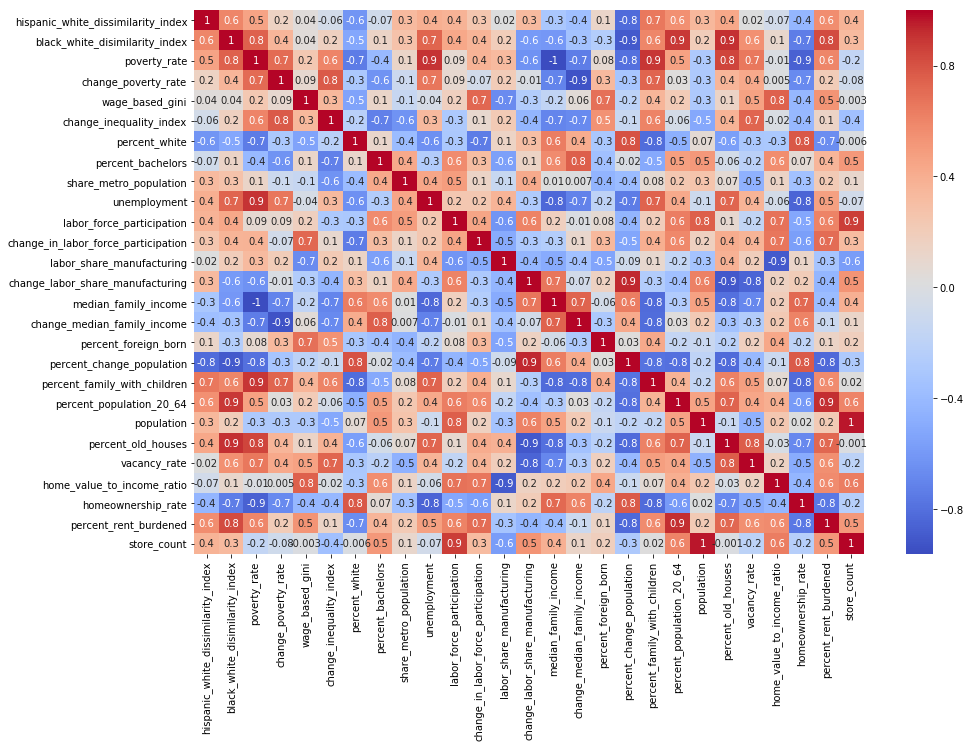

In [37]:
import seaborn as sn
import matplotlib.pyplot as plt

# remove the Atlantic City row just so it doesn't influence any calculations
city_noAC = city_data[city_data['city']!='Atlantic City']

plt.figure(figsize=(15, 10))
sn.heatmap(city_data.corr(), annot=True, fmt = '.1g', cmap = 'coolwarm')

In [39]:
print(city_data['percent_bachelors'])
print(city_data['labor_share_manufacturing'])
print(city_data['change_labor_share_manufacturing'])
print(city_data['percent_population_20_64'])
print(city_data['home_value_to_income_ratio'])

0    16.4
1    23.9
2    20.4
3    16.6
4    18.1
5    20.3
6    11.8
7    36.8
Name: percent_bachelors, dtype: float64
0     3.6
1     3.2
2     8.6
3    13.5
4    12.9
5    10.2
6    10.6
7     3.8
Name: labor_share_manufacturing, dtype: float64
0   -61.8
1    -8.3
2     NaN
3   -64.4
4   -65.2
5   -46.4
6   -68.3
7   -67.8
Name: change_labor_share_manufacturing, dtype: float64
0    60.0
1    59.2
2    54.1
3    61.1
4    61.0
5    57.8
6    57.9
7    63.9
Name: percent_population_20_64, dtype: float64
0    6.0
1    4.3
2    2.9
3    2.4
4    2.1
5    2.9
6    1.9
7    5.5
Name: home_value_to_income_ratio, dtype: float64


I plotted the whole correlation matrix in case there was anything interesting in how the predictors relate to each other, but we are principally interested in the bottom row/right-most column.  That row/column has the correlation for number of stores ('store_count') with the other predictors.  For example, the highest correlations are with labor force participation (0.9), labor share manufacturing (-0.6), and population (1.0, perfectly correlated).  

The high (perfect, since there are only seven cities) correlation with population is not surprising as larger cities will generally have more of anything.  But the rows printed above show where Atlantic City (row 0) falls relative to other cities with respect to other predictors with high store count correlations.  Atlantic City is low population compared to these other cities but does fairly well on the other measures: for example, labor share manufacturing is negatively correlated with number of stores and AC is low on that, and it has a relatively high 'young adult' population percent and high home value to income ratio.

For what it's worth, I tried running a LASSO regression on the data since that is one of the few methods that will adjust for having more predictors than observations (it sets the parameters for many predictors to zero, thus selecting only the strongest/most relevant predictors).  However, it only selected city population, so that wasn't very insightful.

# Results
I discussed most of the results as they came up in the Methodology section, but I will reiterate the high points here:

* For my seven comparison cities, I found comic stores in the area using Foursquare's API.  The cities ranged from having 1 to 29 comic stores.
* For each comic store and (as much as possible) a nearby comparison location, I found the other Foursquare venues nearby so that I could analyze what kinds of areas comic stores tend to be in.
* Using cluster analysis, comic book stores tend to be in business areas, with restaurants, bars, and so on nearby.  Matching areas without a comic store tended to be near parks, trails, or airports; that is, not business-centric areas.
* I mapped restaurants, stores, and bars in my area along with parks, trails, and lakes.  This produced a visualization of where a comic store might do well in my area.
* Finally, I found the correlation between number of stores in a city and various city-level characteristics to see what features correspond to having more comic stores.  Population was, unsurprisingly, number one but there was also a high correlation with having more working age (20 to 64) adults and a low share of the workforce in manufacturing.

# Discussion
Following on the results, it seems like opening a comic store in Egg Harbor Township, New Jersey (or nearby) would be a dicey proposition.  On one hand, there are business areas similar to where comic stores exist in other cities.  Atlantic City (the largest city nearby which has city-level data associated with it) also has characteristics similar to other cities that can support multiple comic stores.  On the other hand, the number one predictor of having more comic stores is population, and Atlantic City/Egg Harbor Township does not have a large population.  Additionally, there are already two comic stores in the area; this could be as many as the area can support.  A deeper dive into the area would be needed in order to make a final decision as to if another comic store could thrive here.

# Conclusion
This report aimed to determine if Egg Harbor Township, New Jersey (a suburb of Atlantic City) would be a good place to open a comic store.  Using Foursquare data with clustering analysis and city-level descriptors (such as demographics) with correlation analysis, the conclusion is that such a store would be hit or miss.  Given that two stores already exist in the area, it might be safer to open a different kind of business or else aim for more of an online presence and less of a brick-and-mortar storefront.